#Install and Load Package

In [ ]:
!pip install skope-rules
!pip install cubist
!pip install eli5
!pip install scikit-plot
!pip install dalex
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression
# load logistic regression model
from sklearn.linear_model import LogisticRegression
# Lload k-nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# load decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# load random forest model
from sklearn.ensemble import RandomForestClassifier
# load SVC
from sklearn.svm import SVC

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load rulefit model
from skrules import SkopeRules

# load scikit-plot modules
import scikitplot as skplt

# load eli5
import eli5

import seaborn as sns
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

#Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df_data = pd.read_csv('/content/gdrive/MyDrive/DS - WallStreet DevOps/FINAL PROJECT/data.csv',sep =';')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_data

,Id,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,0,1845.2,6068.20,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,1,2055.0,6259.10,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,4,1750.0,5767.50,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,5,1812.0,6392.70,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,6,2124.0,6615.60,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,347,13927.9,120075.16,6532.97,1.52,6.58,3.49,328.414357,18191.69,0.9291,97.89,0.0033,5.61,0
266,348,12555.9,123273.87,6443.35,1.53,6.99,4.13,330.319123,18087.59,1.0270,98.64,0.0033,5.77,0
267,349,14121.9,124539.31,6468.76,1.53,6.74,4.08,328.479665,18239.04,1.0499,100.14,0.0032,5.78,0
268,350,13112.7,124293.82,6455.35,1.54,6.39,3.72,330.069829,18186.00,0.8515,102.12,0.0033,5.66,0


In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Id                                      270 non-null    int64  
 1   Ekspor                                  270 non-null    float64
 2   Cadangan Devisa                         270 non-null    float64
 3   IHSG                                    270 non-null    float64
 4   Selisih Pinjaman dan Simpanan           270 non-null    float64
 5   Suku Bunga Simpanan Riil                270 non-null    float64
 6   Selisih BI Rate Riil dan FED Rate Riil  270 non-null    float64
 7   Simpanan bank                           270 non-null    float64
 8   Nilai Tukar Riil                        270 non-null    float64
 9   Nilai Tukar Perdagangan                 270 non-null    float64
 10  M1                                      270 non-null    float6

There are no null from those dataset and the dataset has correct type of data

# Data Cleansing & Preprocessing

In [ ]:
#Drop ID from those dataset
df_data = df_data.drop('Id', axis=1)

In [ ]:
#Check null
df_data.isna().sum()

Ekspor                                    0
Cadangan Devisa                           0
IHSG                                      0
Selisih Pinjaman dan Simpanan             0
Suku Bunga Simpanan Riil                  0
Selisih BI Rate Riil dan FED Rate Riil    0
Simpanan bank                             0
Nilai Tukar Riil                          0
Nilai Tukar Perdagangan                   0
M1                                        0
M2/Cadangan Devisa                        0
M2M                                       0
Krisis                                    0
dtype: int64

In [ ]:
#Check describe for df_data
df_data.describe()

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,8247.868963,53516.383556,2071.609444,1.500222,12.016000,8.328000,134.058398,7232.566259,1.225759,41.406296,0.003716,6.763333,0.111111
std,4853.028611,41132.468503,2014.293535,0.333443,7.509484,7.233576,100.175825,5550.579030,0.214566,29.628941,0.001151,5.115211,0.314853
min,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,4082.750000,19042.000000,462.717500,1.220000,6.622500,5.107500,58.468779,742.267500,1.063950,16.475000,0.003000,5.020000,0.000000
50%,6261.415000,34816.185000,759.030000,1.505000,10.395000,6.515000,83.851499,6753.570000,1.166350,26.455000,0.003200,6.180000,0.000000
75%,12936.765000,102477.375000,3916.700000,1.760000,15.330000,8.822500,245.694303,10000.275000,1.373825,73.185000,0.004600,7.900000,0.000000
max,18530.800000,130196.380000,6597.220000,2.410000,52.980000,59.880000,330.612337,19358.390000,1.857700,104.840000,0.006600,86.970000,1.000000


## Outlier Check for df_data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


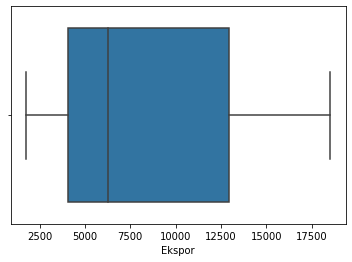

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Ekspor'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


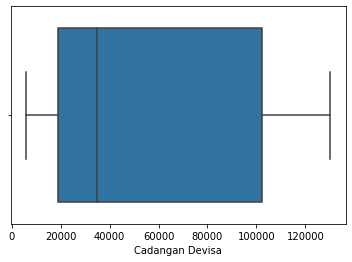

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Cadangan Devisa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


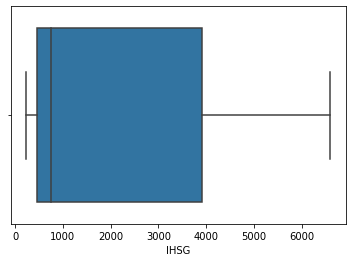

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['IHSG'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


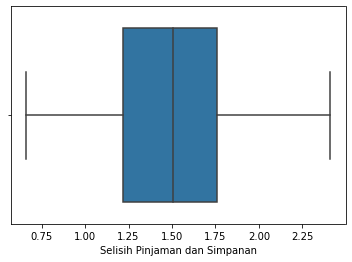

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Selisih Pinjaman dan Simpanan'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


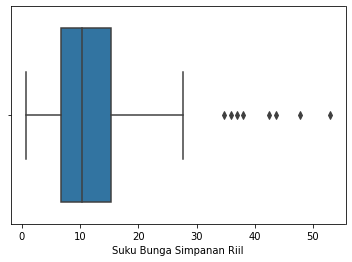

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Suku Bunga Simpanan Riil'])

Outlier detected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


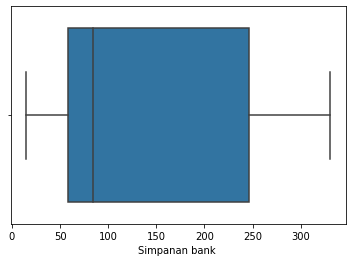

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Simpanan bank '])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


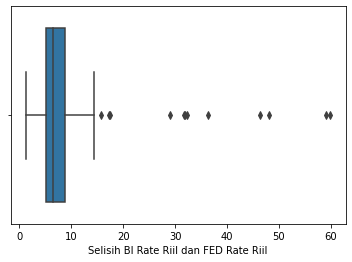

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Selisih BI Rate Riil dan FED Rate Riil'])

Outlier detected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


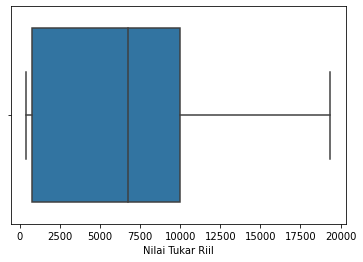

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Nilai Tukar Riil'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


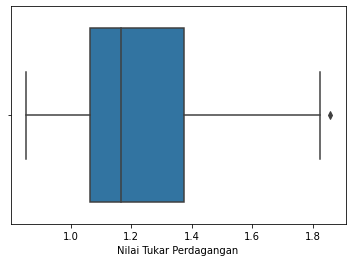

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['Nilai Tukar Perdagangan'])

Outlier detected

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


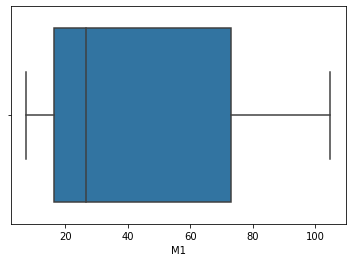

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['M1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


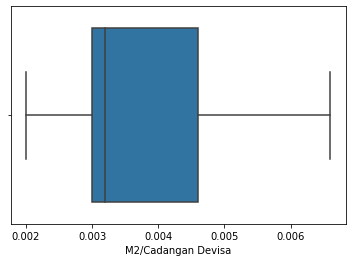

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['M2/Cadangan Devisa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


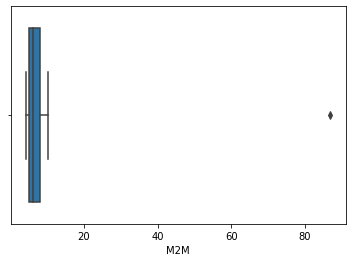

In [ ]:
#Check the Extereme outlier from df_data
sns.boxplot(df_data['M2M'])

Outlier detected

## Remove Outlier for df_data

In [ ]:
#remove outlier from certain column
for x in ['Suku Bunga Simpanan Riil']:
    q75,q25 = np.percentile(df_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_data.loc[df_data[x] < min,x] = np.nan
    df_data.loc[df_data[x] > max,x] = np.nan

for x in ['Selisih BI Rate Riil dan FED Rate Riil']:
    q75,q25 = np.percentile(df_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_data.loc[df_data[x] < min,x] = np.nan
    df_data.loc[df_data[x] > max,x] = np.nan

for x in ['Nilai Tukar Perdagangan']:
    q75,q25 = np.percentile(df_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_data.loc[df_data[x] < min,x] = np.nan
    df_data.loc[df_data[x] > max,x] = np.nan

for x in ['M2M']:
    q75,q25 = np.percentile(df_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_data.loc[df_data[x] < min,x] = np.nan
    df_data.loc[df_data[x] > max,x] = np.nan

In [ ]:
#recheck describe for df_data
df_data.describe()

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
count,270.000000,270.000000,270.000000,270.000000,262.000000,258.000000,270.000000,270.000000,269.000000,270.000000,270.000000,269.000000,270.000000
mean,8247.868963,53516.383556,2071.609444,1.500222,11.113053,7.069690,134.058398,7232.566259,1.223410,41.406296,0.003716,6.465167,0.111111
std,4853.028611,41132.468503,2014.293535,0.333443,5.422617,3.004276,100.175825,5550.579030,0.211458,29.628941,0.001151,1.472970,0.314853
min,1750.000000,5767.500000,226.680000,0.660000,0.680000,1.250000,14.567329,375.390000,0.851500,7.350000,0.002000,4.190000,0.000000
25%,4082.750000,19042.000000,462.717500,1.220000,6.612500,5.007500,58.468779,742.267500,1.062900,16.475000,0.003000,5.020000,0.000000
50%,6261.415000,34816.185000,759.030000,1.505000,9.525000,6.420000,83.851499,6753.570000,1.166200,26.455000,0.003200,6.160000,0.000000
75%,12936.765000,102477.375000,3916.700000,1.760000,14.717500,8.200000,245.694303,10000.275000,1.373300,73.185000,0.004600,7.900000,0.000000
max,18530.800000,130196.380000,6597.220000,2.410000,27.730000,14.380000,330.612337,19358.390000,1.825200,104.840000,0.006600,10.150000,1.000000


# EDA

##Box Plot each Variables

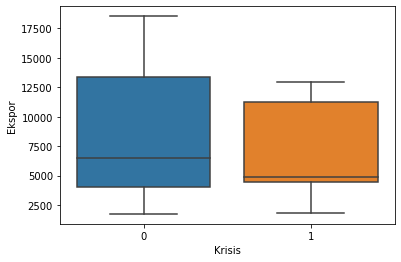

In [ ]:
sns.boxplot(x = "Krisis", y = "Ekspor", data = df_data);

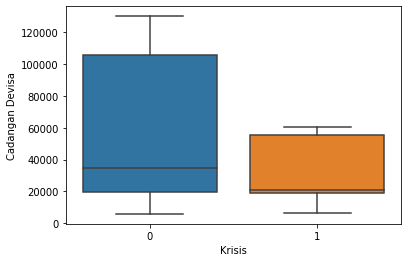

In [ ]:
sns.boxplot(x = "Krisis", y = "Cadangan Devisa", data = df_data);

We can observe there difference between two condition. Higher cadangan devisa that have more than 60k less likely to Krisis.

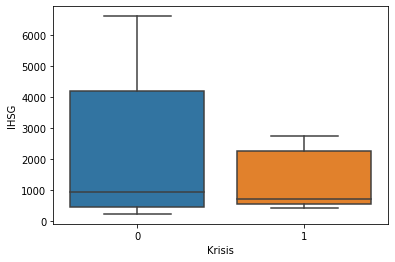

In [ ]:
sns.boxplot(x = "Krisis", y = "IHSG", data = df_data);

We can observe there difference between two condition. Higher IHSG that have more than 2k less likely to Krisis.

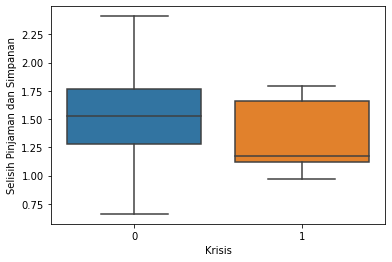

In [ ]:
sns.boxplot(x = "Krisis", y = "Selisih Pinjaman dan Simpanan", data = df_data);

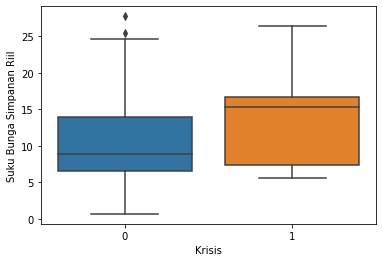

In [ ]:
sns.boxplot(x = "Krisis", y = "Suku Bunga Simpanan Riil", data = df_data);

We can observe there difference between two condition. Higher Suku Bunga Simpanan Riil that have more than 15% likely to Krisis.

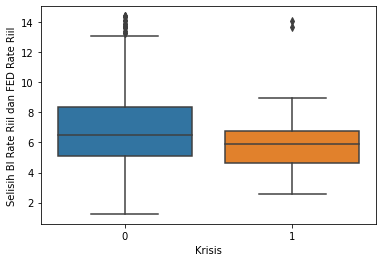

In [ ]:
sns.boxplot(x = "Krisis", y = "Selisih BI Rate Riil dan FED Rate Riil", data = df_data);

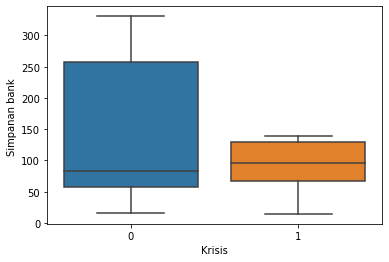

In [ ]:
sns.boxplot(x = "Krisis", y = "Simpanan bank ", data = df_data);

We can observe there difference between two condition. Higher Simpanan Bank that have more than 150 less likely to Krisis.

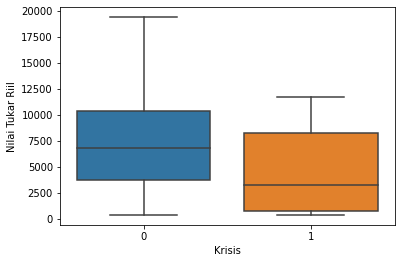

In [ ]:
sns.boxplot(x = "Krisis", y = "Nilai Tukar Riil", data = df_data);

We can observe there difference between two condition. Lower Nilai tukar riil that have below than 3k likely to Krisis.

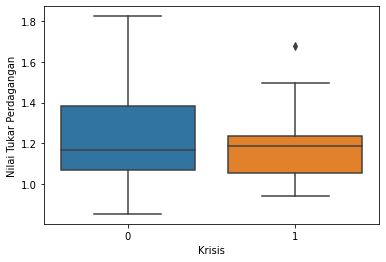

In [ ]:
sns.boxplot(x = "Krisis", y = "Nilai Tukar Perdagangan", data = df_data);

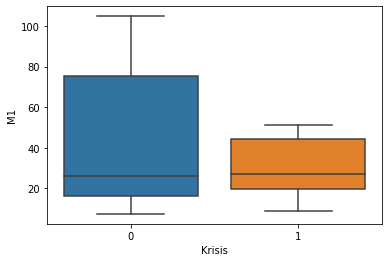

In [ ]:
sns.boxplot(x = "Krisis", y = "M1", data = df_data);

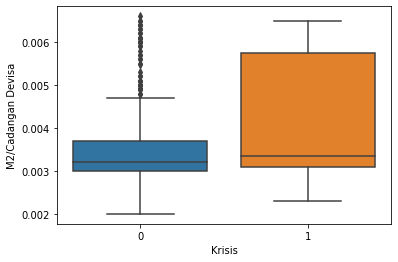

In [ ]:
sns.boxplot(x = "Krisis", y = "M2/Cadangan Devisa", data = df_data);

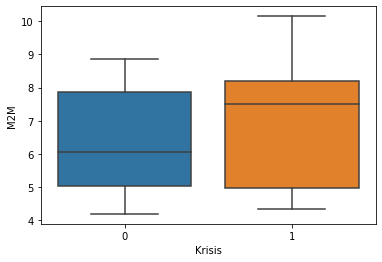

In [ ]:
sns.boxplot(x = "Krisis", y = "M2M", data = df_data);

In [ ]:
df_data

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
0,1845.2,6068.20,504.27,1.24,15.56,4.36,14.567329,376.63,1.2366,10.66,0.0055,6.46,1
1,2055.0,6259.10,612.20,1.24,16.63,5.83,16.707625,375.39,1.2129,12.15,0.0056,6.16,1
2,1750.0,5767.50,624.33,1.22,14.77,7.92,16.067787,388.69,1.0374,12.58,0.0066,6.77,0
3,1812.0,6392.70,614.41,1.19,14.29,7.91,16.274743,396.82,1.0315,12.23,0.0060,7.04,0
4,2124.0,6615.60,556.34,1.18,16.66,9.74,16.913348,397.52,1.0400,12.08,0.0060,6.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,13927.9,120075.16,6532.97,1.52,6.58,3.49,328.414357,18191.69,0.9291,97.89,0.0033,5.61,0
266,12555.9,123273.87,6443.35,1.53,6.99,4.13,330.319123,18087.59,1.0270,98.64,0.0033,5.77,0
267,14121.9,124539.31,6468.76,1.53,6.74,4.08,328.479665,18239.04,1.0499,100.14,0.0032,5.78,0
268,13112.7,124293.82,6455.35,1.54,6.39,3.72,330.069829,18186.00,0.8515,102.12,0.0033,5.66,0


##Pick the potential variable

In [ ]:
# check correlation matrix of df_data
df_data.corr()

,Ekspor,Cadangan Devisa,IHSG,Selisih Pinjaman dan Simpanan,Suku Bunga Simpanan Riil,Selisih BI Rate Riil dan FED Rate Riil,Simpanan bank,Nilai Tukar Riil,Nilai Tukar Perdagangan,M1,M2/Cadangan Devisa,M2M,Krisis
Ekspor,1.000000,0.950518,0.900430,0.605253,-0.748931,-0.521133,0.924782,0.832795,-0.516238,0.926921,-0.565709,-0.860302,-0.079043
Cadangan Devisa,0.950518,1.000000,0.971074,0.552219,-0.711494,-0.484068,0.984193,0.909931,-0.527937,0.978206,-0.556156,-0.805006,-0.175155
IHSG,0.900430,0.971074,1.000000,0.487059,-0.661355,-0.516725,0.982876,0.901753,-0.605552,0.985472,-0.428210,-0.771569,-0.145732
Selisih Pinjaman dan Simpanan,0.605253,0.552219,0.487059,1.000000,-0.852031,-0.622818,0.525385,0.485909,-0.247028,0.538413,-0.447082,-0.679202,-0.179407
Suku Bunga Simpanan Riil,-0.748931,-0.711494,-0.661355,-0.852031,1.000000,0.776219,-0.694343,-0.717562,0.256960,-0.695067,0.570092,0.811994,0.192698
Selisih BI Rate Riil dan FED Rate Riil,-0.521133,-0.484068,-0.516725,-0.622818,0.776219,1.000000,-0.526840,-0.468733,0.275567,-0.533425,0.195541,0.592545,-0.103047
Simpanan bank,0.924782,0.984193,0.982876,0.525385,-0.694343,-0.526840,1.000000,0.899530,-0.575413,0.993689,-0.444784,-0.768863,-0.148633
Nilai Tukar Riil,0.832795,0.909931,0.901753,0.485909,-0.717562,-0.468733,0.899530,1.000000,-0.384962,0.888197,-0.658112,-0.777999,-0.186909
Nilai Tukar Perdagangan,-0.516238,-0.527937,-0.605552,-0.247028,0.256960,0.275567,-0.575413,-0.384962,1.000000,-0.610475,-0.130584,0.447065,-0.079604
M1,0.926921,0.978206,0.985472,0.538413,-0.695067,-0.533425,0.993689,0.888197,-0.610475,1.000000,-0.415214,-0.784497,-0.133496


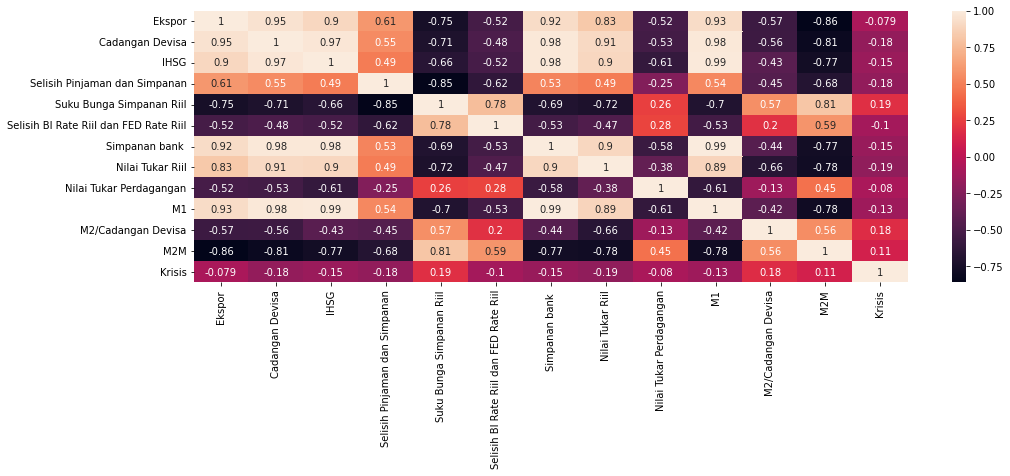

In [ ]:
#visualize with heatmap
plt.figure(figsize=(16,5))
sns.heatmap(df_data.corr(), annot=True)

We found that M2/Cadangan Devisa, M2M, and Suku Bunga Simpanan Riil have positive impact on Krisis. So, the currently hypotesis are the higher those of number, the higher probability to Crisis.

So we try to use those of variable to explore more

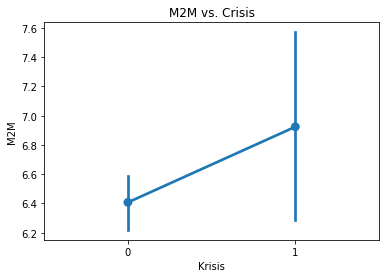

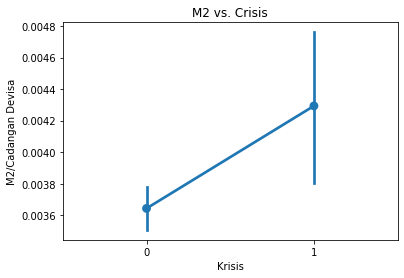

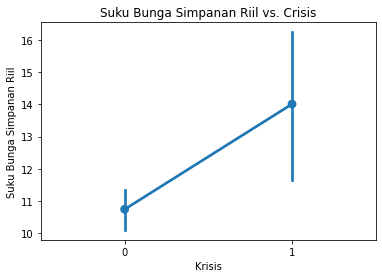

In [ ]:
sns.pointplot(y=df_data['M2M'] , x= df_data['Krisis'])
plt.title('M2M vs. Crisis')
plt.show()

sns.pointplot(y=df_data['M2/Cadangan Devisa'] , x= df_data['Krisis'])
plt.title('M2 vs. Crisis')
plt.show()

sns.pointplot(y=df_data['Suku Bunga Simpanan Riil'] , x= df_data['Krisis'])
plt.title('Suku Bunga Simpanan Riil vs. Crisis')
plt.show()

The condition with crisis have a higher those variabel

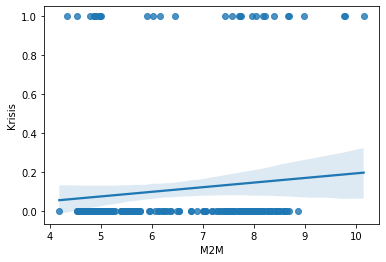

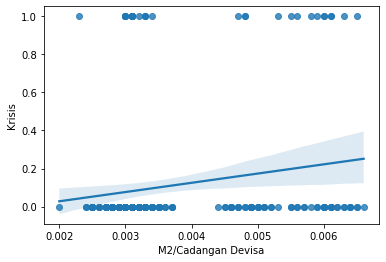

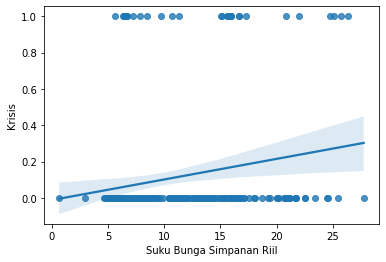

In [ ]:
sns.regplot(data=df_data, y='Krisis', x='M2M')
plt.show()

sns.regplot(data=df_data, y='Krisis', x='M2/Cadangan Devisa')
plt.show()

sns.regplot(data=df_data, y='Krisis', x='Suku Bunga Simpanan Riil')
plt.show()

As the above plot shows, the relationship between Crises and those of variables are slighly linear. But, Suku bunga simpanan riil is more likely linear than other.

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Ekspor                                  270 non-null    float64
 1   Cadangan Devisa                         270 non-null    float64
 2   IHSG                                    270 non-null    float64
 3   Selisih Pinjaman dan Simpanan           270 non-null    float64
 4   Suku Bunga Simpanan Riil                262 non-null    float64
 5   Selisih BI Rate Riil dan FED Rate Riil  258 non-null    float64
 6   Simpanan bank                           270 non-null    float64
 7   Nilai Tukar Riil                        270 non-null    float64
 8   Nilai Tukar Perdagangan                 269 non-null    float64
 9   M1                                      270 non-null    float64
 10  M2/Cadangan Devisa                      270 non-null    float6

# Train-Test Split

In [ ]:
# drop certain columns
df = df_data.drop(
    ['Ekspor', 'Cadangan Devisa','IHSG','Selisih Pinjaman dan Simpanan','Suku Bunga Simpanan Riil','Selisih BI Rate Riil dan FED Rate Riil','Simpanan bank ','Nilai Tukar Riil','Nilai Tukar Perdagangan'], 
    axis = 1
)

In [ ]:
#Check null
df.isna().sum()

M1                    0
M2/Cadangan Devisa    0
M2M                   1
Krisis                0
dtype: int64

In [ ]:
#drop null
df1 = df.dropna()

In [ ]:
# train-test split
y = df1['Krisis'].values
X = df1.drop(['Krisis'], axis = 1).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=1000
)

#Modelling with ML

##Logistic Regression

In [ ]:
X_train_int = sm.add_constant(X_train)
logistic_reg_sm = sm.Logit(y_train, X_train_int).fit()

Optimization terminated successfully.
         Current function value: 0.337242
         Iterations 7


In [ ]:
# check summary of model
logistic_reg_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.036   
Dependent Variable: y                AIC:              153.0140
Date:               2022-08-07 16:27 BIC:              166.4965
No. Observations:   215              Log-Likelihood:   -72.507 
Df Model:           3                LL-Null:          -75.230 
Df Residuals:       211              LLR p-value:      0.14194 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|     [0.025    0.975] 
----------------------------------------------------------------
const    -1.9051    1.8940  -1.0058  0.3145    -5.6172    1.8071
x1       -0.0143    0.0133  -1.0750  0.2824    -0.0405    0.0118
x2      307.4305  211.8005   1.4515  0.1466  -107.6909  722.5519
x3       -0.1260    0.2535  -0.4969  0.6192    -0.6228    0.3709
===============================================================

"""

In [ ]:
# check model coefficient
logistic_reg_sm.params

array([-1.90505253e+00, -1.43309358e-02,  3.07430501e+02, -1.25971679e-01])

In [ ]:
#Fitting model logistic reg
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#check score logistic regression 
from sklearn.model_selection import cross_val_score

y_pred = logreg.predict(X_test)
cv_results = cross_val_score(logreg, X, y, cv = 5)
cv_results

array([0.88888889, 0.88888889, 0.87037037, 0.88888889, 0.88679245])

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        48
           1       0.00      0.00      0.00         6

    accuracy                           0.89        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.79      0.89      0.84        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Define Other Model

We try to use 5 ML

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 1,
)

rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001,
    class_weight = {0: 0.265353, 1:0.734647}
)

svm_clf = SVC(
    random_state = 1000,
    probability=True,
    class_weight = {0: 0.265353, 1:0.734647}
)

xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000,
    class_weight = {0: 0.265353, 1:0.734647}
)

## Fitting Model

In [ ]:
knn_clf.fit(X_train, y_train)
dc_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

XGBClassifier(class_weight={0: 0.265353, 1: 0.734647}, n_estimators=1000,
              random_state=1000)

## Model Evaluation

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

###KNN

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=['Tidak Krisis','Krisis'], output_dict=True))

,Tidak Krisis,Krisis,accuracy,macro avg,weighted avg
precision,0.957447,0.571429,0.907407,0.764438,0.914556
recall,0.937500,0.666667,0.907407,0.802083,0.907407
f1-score,0.947368,0.615385,0.907407,0.781377,0.910481
support,48.000000,6.000000,0.907407,54.000000,54.000000


In [ ]:
print (classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.57      0.67      0.62         6

    accuracy                           0.91        54
   macro avg       0.76      0.80      0.78        54
weighted avg       0.91      0.91      0.91        54



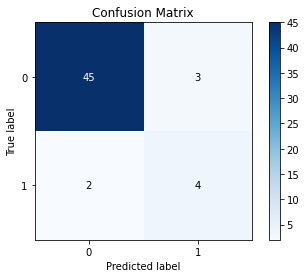

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, knn_pred);

In [ ]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


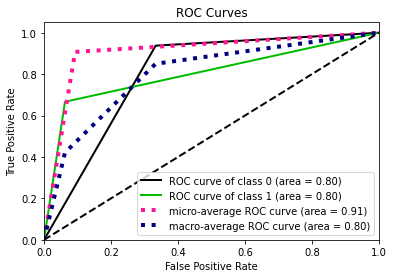

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

In [ ]:
#Cross Validation score
cv_result = cross_val_score(
    estimator=knn_clf,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=1
)
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [1.         0.86363636 0.86363636 0.86363636 0.95454545 1.
 0.85714286 1.         0.85714286 0.85714286]


In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.912 +/- 0.064


In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.90740741, 0.94444444, 0.94444444, 0.94444444, 0.94444444,
       0.92592593, 0.94444444, 0.87037037, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889])

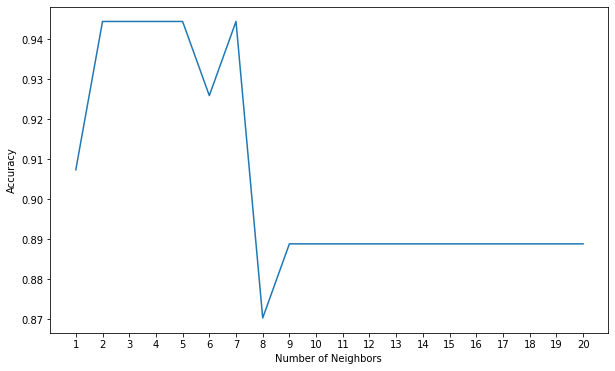

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

As we can see, we found that the best K = 2, so we try to tune KNN

####Tune KNN in K=2 with GridSearch CV

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : [2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
# find the best score
g_res.best_score_

0.9255346896191967

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')

#fitting
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

#####Model Evaluation with Tune

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9534883720930233
Test set accuracy:  0.9444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[47  1]
 [ 2  4]]


In [ ]:
#Without Tune
print (classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        48
           1       0.57      0.67      0.62         6

    accuracy                           0.91        54
   macro avg       0.76      0.80      0.78        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
#with Tune
print (classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.80      0.67      0.73         6

    accuracy                           0.94        54
   macro avg       0.88      0.82      0.85        54
weighted avg       0.94      0.94      0.94        54



we found that if we tune KNN, there is high accuracy than if we not tune the KNN.

In [ ]:
#Cross Validation score with Tune
cv_result = cross_val_score(
    estimator=knn,
    X=X_train,
    y=y_train,
    cv=10,
    n_jobs=1
)
print('CV accuracy scores: %s' % cv_result)

CV accuracy scores: [0.95454545 0.90909091 0.95454545 0.86363636 0.95454545 1.
 0.9047619  1.         0.9047619  0.9047619 ]


In [ ]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(cv_result),np.std(cv_result)))

CV accuracy: 0.935 +/- 0.043


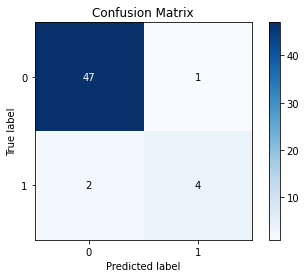

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_knn);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


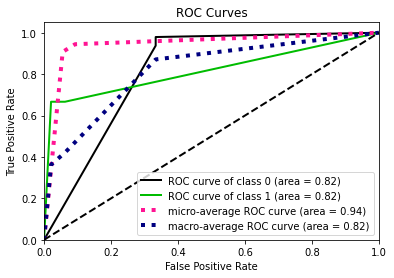

In [ ]:
knn_pred_proba = knn.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

###Decision Tree

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=['Tidak Krisis','Krisis'], output_dict=True))

,Tidak Krisis,Krisis,accuracy,macro avg,weighted avg
precision,0.958333,0.666667,0.925926,0.8125,0.925926
recall,0.958333,0.666667,0.925926,0.8125,0.925926
f1-score,0.958333,0.666667,0.925926,0.8125,0.925926
support,48.000000,6.000000,0.925926,54.0000,54.000000


In [ ]:
print (classification_report(y_test, dc_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.67      0.67      0.67         6

    accuracy                           0.93        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.93      0.93      0.93        54



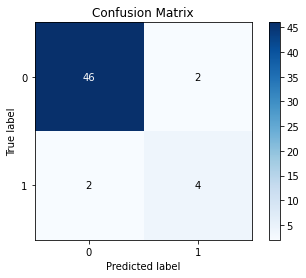

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, dc_pred);

In [ ]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


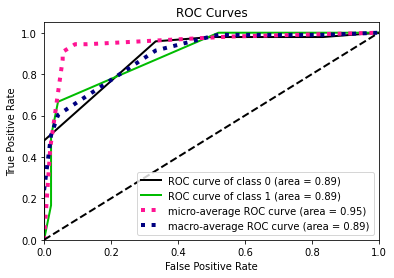

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

###Random Forest

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['Tidak Krisis','Krisis'], output_dict=True))

,Tidak Krisis,Krisis,accuracy,macro avg,weighted avg
precision,0.940000,0.75,0.925926,0.845000,0.918889
recall,0.979167,0.50,0.925926,0.739583,0.925926
f1-score,0.959184,0.60,0.925926,0.779592,0.919274
support,48.000000,6.00,0.925926,54.000000,54.000000


In [ ]:
print (classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.75      0.50      0.60         6

    accuracy                           0.93        54
   macro avg       0.84      0.74      0.78        54
weighted avg       0.92      0.93      0.92        54



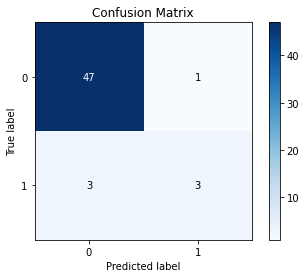

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, rf_pred);

In [ ]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


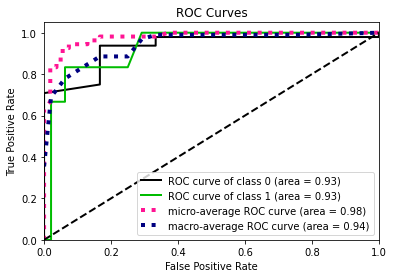

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

###SVM RBF

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=['Tidak Krisis','Krisis'], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Tidak Krisis,Krisis,accuracy,macro avg,weighted avg
precision,0.888889,0.0,0.888889,0.444444,0.790123
recall,1.000000,0.0,0.888889,0.500000,0.888889
f1-score,0.941176,0.0,0.888889,0.470588,0.836601
support,48.000000,6.0,0.888889,54.000000,54.000000


In [ ]:
print (classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        48
           1       0.00      0.00      0.00         6

    accuracy                           0.89        54
   macro avg       0.44      0.50      0.47        54
weighted avg       0.79      0.89      0.84        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


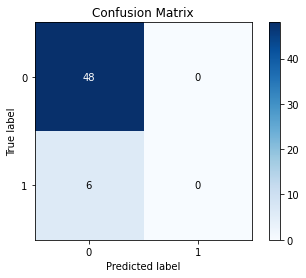

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, svm_pred);

In [ ]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


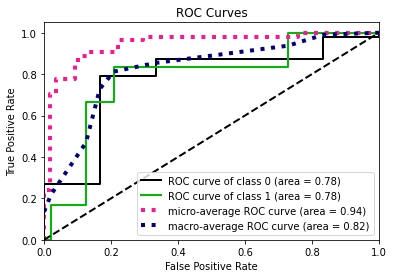

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

###XGBoost 

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['Tidak Krisis','Krisis'], output_dict=True))

,Tidak Krisis,Krisis,accuracy,macro avg,weighted avg
precision,0.921569,0.666667,0.907407,0.794118,0.893246
recall,0.979167,0.333333,0.907407,0.656250,0.907407
f1-score,0.949495,0.444444,0.907407,0.696970,0.893378
support,48.000000,6.000000,0.907407,54.000000,54.000000


In [ ]:
print (classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        48
           1       0.67      0.33      0.44         6

    accuracy                           0.91        54
   macro avg       0.79      0.66      0.70        54
weighted avg       0.89      0.91      0.89        54



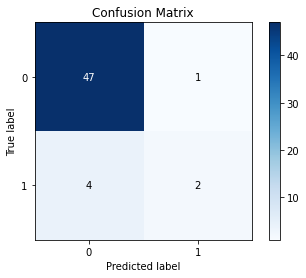

In [ ]:
# check confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

In [ ]:
#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


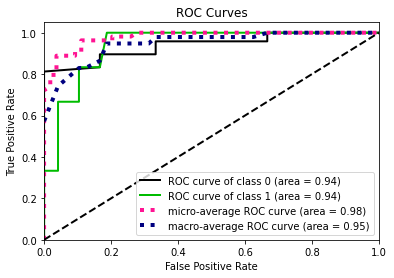

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

We can determine the accuracy of the models we create with performance metrics such as: accuracy, F1 Score, precision, Micro ROC.

1.   KNN = 91%, 95%, 96%, 80%
2.   KNN Tuned Model = 94%, 97%, 96%, 94% ---> *Best model cause accuracy, F1 Score, and precision*
3.   Decision Tree = 93%, 96%, 96%, 95%
4.   Random Forest = 93%, 96%, 94%, 98%
5.   SVM RBF = 89%, 94%, 89%, 98%
6.   XGBoost = 91%, 95%, 92%, 98%
7.   Logistic Regression = 89%, 94%, 89%



Hence, KNN Tuned Model is the best model we should choose to predict a dataset of 'predict.csv'

#Predict df_predict with KNN Tuned Model

In [ ]:
classes = {0:'TIDAK KRISIS',1:'KRISIS'}

In [ ]:
#load data
df_predict = pd.read_csv('/content/gdrive/MyDrive/DS - WallStreet DevOps/FINAL PROJECT/predict.csv',sep = ';')

In [ ]:
# drop certain columns
data_predict = df_predict.drop(
    ['Id','Ekspor', 'Cadangan Devisa','IHSG','Selisih Pinjaman dan Simpanan','Suku Bunga Simpanan Riil','Selisih BI Rate Riil dan FED Rate Riil','Simpanan bank ','Nilai Tukar Riil','Nilai Tukar Perdagangan'], 
    axis = 1
)

data_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   M1                  83 non-null     float64
 1   M2/Cadangan Devisa  83 non-null     float64
 2   M2M                 83 non-null     float64
dtypes: float64(3)
memory usage: 2.1 KB


In [ ]:
final_predict = knn.predict(data_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
final_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classes[final_predict[np.random.randint(0,82)]])

TIDAK KRISIS


The following are the results of crisis predictions using the "predict.csv' dataset where the model used is the KNN Tuned Model

In [ ]:
#Create column of 'Krisis Prediction' to data_predict
data_predict['Krisis Prediction'] = final_predict.tolist()
data_predict

,M1,M2/Cadangan Devisa,M2M,Krisis Prediction
0,12.27,0.0062,5.78,0
1,11.56,0.0071,6.92,0
2,12.33,0.0063,7.02,0
3,12.05,0.0061,7.14,0
4,12.04,0.0052,7.84,0
...,...,...,...,...
78,98.95,0.0031,5.19,0
79,94.10,0.0032,5.50,0
80,94.56,0.0033,5.63,0
81,98.00,0.0034,5.69,0
